In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm

マイクロソフト：ナスダック
コカコーラ：NYSE
マクドナルド：NYSE
ナイキ：NYSE

In [2]:
tickers = ["MSFT","KO","MCD","NKE"]
sec_data = pd.DataFrame()

for t in tickers:
    sec_data[t] = wb.DataReader(t,data_source="yahoo",start="2010-1-1",end="2020-12-31")["Adj Close"]

In [3]:
sec_data.head()

,MSFT,KO,MCD,NKE
Date,,,,
2009-12-31,23.541964,19.632374,44.204788,14.295533
2010-01-04,23.904984,19.646149,44.445511,14.139742
2010-01-05,23.912708,19.408495,44.105690,14.196001
2010-01-06,23.765955,19.401611,43.503922,14.109453
2010-01-07,23.518797,19.353390,43.822495,14.247930


In [4]:
sec_data.tail()

,MSFT,KO,MCD,NKE
Date,,,,
2020-12-24,220.898376,51.806725,206.658371,140.543198
2020-12-28,223.089996,52.504726,209.229507,141.366989
2020-12-29,222.286728,52.475643,207.948822,140.513412
2020-12-30,219.837234,52.776165,206.824554,140.523331
2020-12-31,220.571106,53.163948,209.776978,140.414169


In [5]:
sec_returns = (sec_data / sec_data.iloc[0])*100

In [6]:
sec_returns.head()

,MSFT,KO,MCD,NKE
Date,,,,
2009-12-31,100.000000,100.000000,100.000000,100.000000
2010-01-04,101.542012,100.070164,100.544562,98.910210
2010-01-05,101.574825,98.859644,99.775820,99.303754
2010-01-06,100.951456,98.824582,98.414500,98.698335
2010-01-07,99.901594,98.578959,99.135176,99.667004


In [7]:
sec_returns.tail()

,MSFT,KO,MCD,NKE
Date,,,,
2020-12-24,938.317553,263.884159,467.502231,983.126658
2020-12-28,947.626971,267.439521,473.318652,988.889238
2020-12-29,944.214900,267.291381,470.421487,982.918305
2020-12-30,933.810104,268.822128,467.878171,982.987685
2020-12-31,936.927394,270.797350,474.557137,982.224080


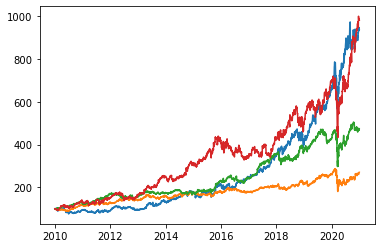

In [8]:
#正規化した時のプロット
plt.plot(figsize=(10,8))
plt.plot(sec_returns)

<AxesSubplot:xlabel='Date'>

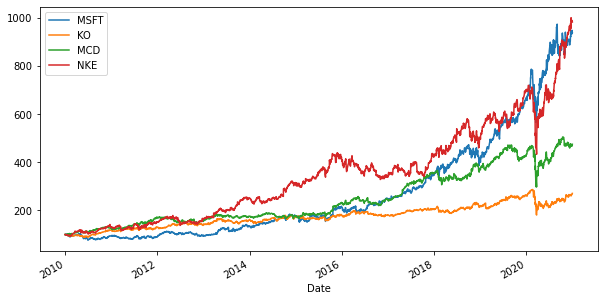

In [9]:
(sec_data / sec_data.iloc[0] *100).plot(figsize=(10,5))

## マイクロソフト社の株価分析

In [10]:
data_MSFT = sec_data["MSFT"]
data_MSFT.head()

Date
2009-12-31    23.541964
2010-01-04    23.904984
2010-01-05    23.912708
2010-01-06    23.765955
2010-01-07    23.518797
Name: MSFT, dtype: float64

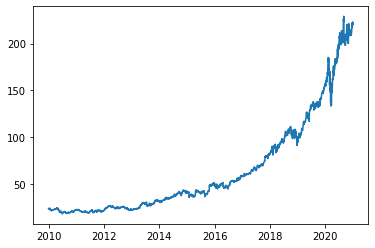

In [11]:
#株価の上がり方
plt.plot(figsize=(10,8))
plt.plot(data_MSFT)

<AxesSubplot:xlabel='Date'>

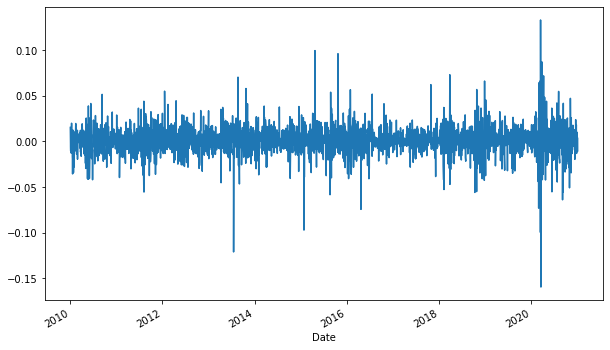

In [12]:
#単利
log_MSFE_return = np.log(data_MSFT/data_MSFT.shift(1))
log_MSFE_return.plot(figsize=(10,6))

## マイクロソフト社の株価の予測

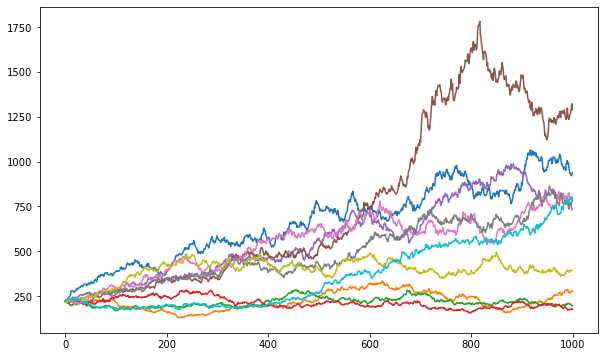

In [13]:
#単利
log_MSFE_return = np.log(data_MSFT/data_MSFT.shift(1))
#平均
u_MSFT = log_MSFE_return.mean() 
#標準偏差
stdev_MSFT = log_MSFE_return.std()
#分散
var_MSFT = log_MSFE_return.var()
#ドリフト値
drift_MSFT = u_MSFT - (0.5 * var_MSFT)

#データ数
t_intervals = 1000
iterations = 10
#必要なデータを正規分布から得る
daily_returns_MSFT = np.exp(drift_MSFT + stdev_MSFT * norm.ppf(np.random.rand(t_intervals,iterations)))

#予測データの取得
S0_MSFT=data_MSFT.iloc[-1]
price_list_MSFT = np.zeros_like(daily_returns_MSFT)
price_list_MSFT[0] = S0_MSFT
for t in range(1,t_intervals):
    price_list_MSFT[t] = price_list_MSFT[t-1] * daily_returns_MSFT[t]

plt.figure(figsize=(10,6))
plt.plot(price_list_MSFT)

## マイクロソフト社のブラックショールズ方程式の適応

In [121]:
def d1(S, K, r, stdev, T):
    return (np.log(S / K) + (r + stdev ** 2 /2) * T) / (stdev * np.sqrt(T))

def d2(S, K, r, stdev, T):
    return (np.log(S / K) + (r - stdev ** 2 / 2) * T) / (stdev * np.sqrt(T))

def BSM(S, K, r, stdev, T):
    return (S * norm.cdf(d1(S, K, r, stdev, T))) - (K * np.exp(-r*T) * norm.cdf(d2(S, K, r, stdev, T)))

ticker = "MSFT"
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker,data_source="yahoo",start="2021-1-1",end="2021-12-31")["Adj Close"]
log_returns = np.log(1 + data.pct_change())
S = data.iloc[-1]
stdev = log_returns.std() * 250 ** 0.5
r = 0.006
K = 130.0
T = 1

In [122]:
d1(S,K,r,stdev,T)

MSFT    4.673525
dtype: float64

In [123]:
d2(S,K,r,stdev,T)

MSFT    4.464166
dtype: float64

In [124]:
BSM_MSFT = BSM(S,K,r,stdev,T)
print(BSM_MSFT)

MSFT    207.097693
Name: 2021-12-31 00:00:00, dtype: float64


## マイクロソフト社のモンテカルロシミュレーションの適応

 ...]

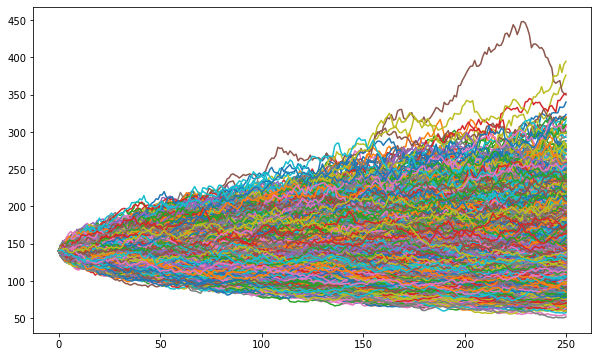

In [91]:
T = 1
r = 0.006
stdev = log_returns.std() * 250 ** 0.5
t_intervals = 250
#iterations = 10
iterations =10000

delta_t = T/t_intervals

stdev = stdev.values


delta_t = T/t_intervals


Z = np.random.standard_normal((t_intervals + 1,iterations))
S = np.zeros_like(Z)
S0 = data.iloc[-1]
S[0] = S0


for t in range(1,t_intervals+1):
    S[t] = S[t-1] * np.exp((r-0.5*stdev**2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

plt.figure(figsize=(10,6))
plt.plot(S)

In [41]:
#コールオプションの式
p = np.maximum(S[-1] - 130,0)

#モンテカルロ法によって価格を推定
C_MSFT = np.exp(-r*T) * np.sum(p)/iterations

In [42]:
print(C_MSFT)
print(BSM_MSFT)

91.62041908991841
MSFT    91.612797
Name: 2020-12-31 00:00:00, dtype: float64


## コカコーラ社の株価分析

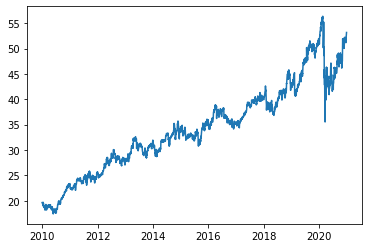

In [44]:
data_KO = sec_data["KO"]
plt.plot(figsize=(10,8))
plt.plot(data_KO)

## コカコーラ社の株価の予測

 ...]

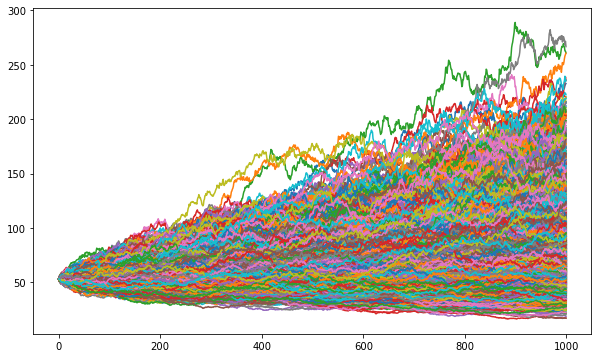

In [96]:
#単利
log_KO_return = np.log(data_KO/data_KO.shift(1))
#平均
u_KO = log_KO_return.mean() 
#標準偏差
stdev_KO = log_KO_return.std()
#分散
var_KO = log_KO_return.var()
#ドリフト値
drift_KO = u_KO - (0.5 * var_KO)

#データ数
t_intervals = 1000
iterations = 10000
#必要なデータを正規分布から得る
daily_returns_KO = np.exp(drift_KO + stdev_KO * norm.ppf(np.random.rand(t_intervals,iterations)))

#予測データの取得
S0_KO=data_KO.iloc[-1]
price_list_KO = np.zeros_like(daily_returns_KO)
price_list_KO[0] = S0_KO
for t in range(1,t_intervals):
    price_list_KO[t] = price_list_KO[t-1] * daily_returns_KO[t]

plt.figure(figsize=(10,6))
plt.plot(price_list_KO)

## コカコーラ社のブラックショールズ方程式の適応

In [46]:
def d1(S, K, r, stdev, T):
    return (np.log(S / K) + (r + stdev ** 2 /2) * T) / (stdev * np.sqrt(T))

def d2(S, K, r, stdev, T):
    return (np.log(S / K) + (r - stdev ** 2 / 2) * T) / (stdev * np.sqrt(T))

def BSM(S, K, r, stdev, T):
    return (S * norm.cdf(d1(S, K, r, stdev, T))) - (K * np.exp(-r*T) * norm.cdf(d2(S, K, r, stdev, T)))

ticker = "KO"
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker,data_source="yahoo",start="2010-1-1",end="2020-12-31")["Adj Close"]
log_returns = np.log(1 + data.pct_change())
S = data.iloc[-1]
stdev = log_returns.std() * 250 ** 0.5
r = 0.006
K = 130.0
T = 1
BSM_KO = BSM(S, K, r, stdev, T)

In [47]:
d1(S,K,r,stdev,T)

KO   -4.976504
dtype: float64

In [48]:
d2(S,K,r,stdev,T)

KO   -5.151883
dtype: float64

In [49]:
print(BSM_KO)

KO    5.477833e-07
Name: 2020-12-31 00:00:00, dtype: float64


## コカコーラ社のモンテカルロシミュレーションの適応

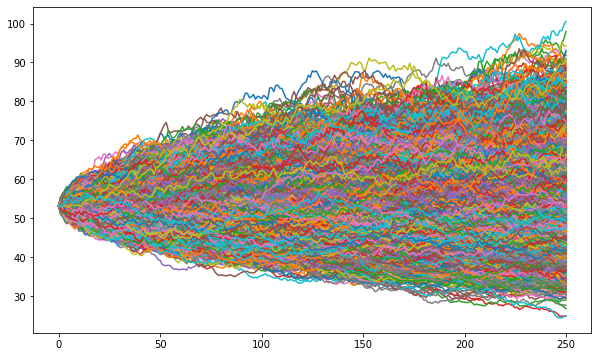

In [115]:
ticker = "KO"
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker,data_source="yahoo",start="2010-1-1",end="2020-12-31")["Adj Close"]
log_returns = np.log(1 + data.pct_change())

T = 1
r = 0.006
stdev = log_returns.std() * 250 ** 0.5
delta_t = T/t_intervals

stdev = stdev.values
t_intervals = 250
iterations = 10000

delta_t = T/t_intervals

Z = np.random.standard_normal((t_intervals + 1,iterations))
S = np.zeros_like(Z)
S0 = data.iloc[-1]
S[0] = S0

for t in range(1,t_intervals+1):
    S[t] = S[t-1] * np.exp((r-0.5*stdev**2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

plt.figure(figsize=(10,6))
plt.plot(S)

#コールオプションの式
p = np.maximum(S[-1] - 130,0)

#モンテカルロ法によって価格を推定
C_KO = np.exp(-r*T) * np.sum(p)/iterations

In [56]:
print(C_KO)
print(BSM_KO)

0.0
KO    5.477833e-07
Name: 2020-12-31 00:00:00, dtype: float64


## マクドナルド社の株価分析

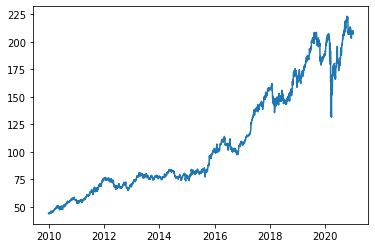

In [57]:
data_MCD = sec_data["MCD"]
plt.plot(figsize=(10,8))
plt.plot(data_MCD)

## マクドナルド社の株価予測

 ...]

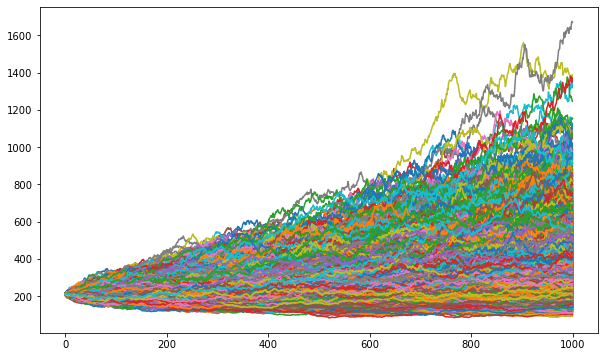

In [101]:
#単利
log_MCD_return = np.log(data_MCD/data_MCD.shift(1))
#平均
u_MCD = log_MCD_return.mean() 
#標準偏差
stdev_MCD = log_MCD_return.std()
#分散
var_MCD = log_MCD_return.var()
#ドリフト値
drift_MCD = u_MCD - (0.5 * var_MCD)

#データ数
t_intervals = 1000
iterations = 10000
#必要なデータを正規分布から得る
daily_returns_MCD = np.exp(drift_MCD + stdev_MCD * norm.ppf(np.random.rand(t_intervals,iterations)))

#予測データの取得
S0_MCD=data_MCD.iloc[-1]
price_list_MCD = np.zeros_like(daily_returns_MCD)
price_list_MCD[0] = S0_MCD
for t in range(1,t_intervals):
    price_list_MCD[t] = price_list_MCD[t-1] * daily_returns_MCD[t]

plt.figure(figsize=(10,6))
plt.plot(price_list_MCD)

## マクドナルド社のブラックショールズ方程式の適応

In [59]:
def d1(S, K, r, stdev, T):
    return (np.log(S / K) + (r + stdev ** 2 /2) * T) / (stdev * np.sqrt(T))

def d2(S, K, r, stdev, T):
    return (np.log(S / K) + (r - stdev ** 2 / 2) * T) / (stdev * np.sqrt(T))

def BSM(S, K, r, stdev, T):
    return (S * norm.cdf(d1(S, K, r, stdev, T))) - (K * np.exp(-r*T) * norm.cdf(d2(S, K, r, stdev, T)))

ticker = "MCD"
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker,data_source="yahoo",start="2010-1-1",end="2020-12-31")["Adj Close"]
log_returns = np.log(1 + data.pct_change())
S = data.iloc[-1]
stdev = log_returns.std() * 250 ** 0.5
r = 0.006
K = 130.0
T = 1
BSM_MCD = BSM(S, K, r, stdev, T)

## マクドナルド社のモンテカルロシミュレーションの適応

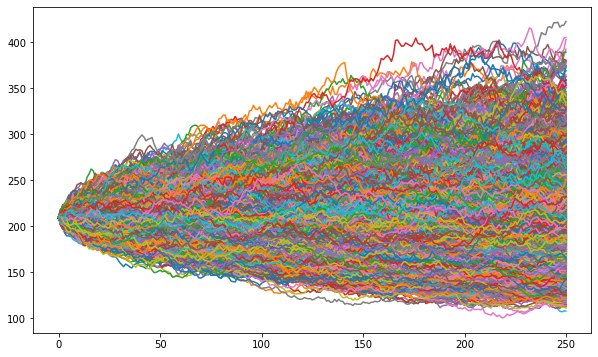

In [120]:
ticker = "MCD"
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker,data_source="yahoo",start="2010-1-1",end="2020-12-31")["Adj Close"]
log_returns = np.log(1 + data.pct_change())

T = 1
r = 0.006
stdev = log_returns.std() * 250 ** 0.5
delta_t = T/t_intervals

stdev = stdev.values
t_intervals = 250
iterations = 10000

delta_t = T/t_intervals

Z = np.random.standard_normal((t_intervals + 1,iterations))
S = np.zeros_like(Z)
S0 = data.iloc[-1]
S[0] = S0

for t in range(1,t_intervals+1):
    S[t] = S[t-1] * np.exp((r-0.5*stdev**2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

plt.figure(figsize=(10,6))
plt.plot(S)

#コールオプションの式
p = np.maximum(S[-1] - 130,0)

#モンテカルロ法によって価格を推定
C_MCD = np.exp(-r*T) * np.sum(p)/iterations

In [72]:
print(C_MCD)
print(BSM_MCD)

80.66743268503744
MCD    80.610019
Name: 2020-12-31 00:00:00, dtype: float64


## ナイキ社の株価分析

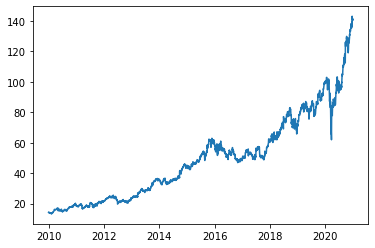

In [73]:
data_NKE = sec_data["NKE"]
plt.plot(figsize=(10,8))
plt.plot(data_NKE)

## ナイキ社の株価の予測

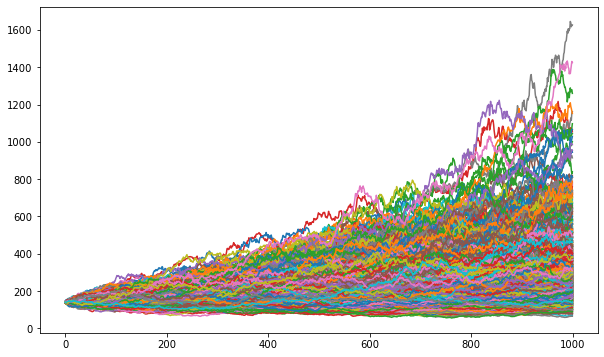

In [105]:
#単利
log_NKE_return = np.log(data_NKE/data_NKE.shift(1))
#平均
u_NKE = log_NKE_return.mean() 
#標準偏差
stdev_NKE = log_NKE_return.std()
#分散
var_NKE = log_NKE_return.var()
#ドリフト値
drift_NKE = u_NKE - (0.5 * var_NKE)

#データ数
t_intervals = 1000
iterations = 10000
#必要なデータを正規分布から得る
daily_returns_NKE = np.exp(drift_NKE + stdev_NKE * norm.ppf(np.random.rand(t_intervals,iterations)))

#予測データの取得
S0_NKE=data_NKE.iloc[-1]
price_list_NKE = np.zeros_like(daily_returns_NKE)
price_list_NKE[0] = S0_NKE
for t in range(1,t_intervals):
    price_list_NKE[t] = price_list_NKE[t-1] * daily_returns_NKE[t]




plt.figure(figsize=(10,6))
plt.plot(price_list_NKE)

## ナイキ社のブラックショールズ方程式の適応

In [75]:
def d1(S, K, r, stdev, T):
    return (np.log(S / K) + (r + stdev ** 2 /2) * T) / (stdev * np.sqrt(T))

def d2(S, K, r, stdev, T):
    return (np.log(S / K) + (r - stdev ** 2 / 2) * T) / (stdev * np.sqrt(T))

def BSM(S, K, r, stdev, T):
    return (S * norm.cdf(d1(S, K, r, stdev, T))) - (K * np.exp(-r*T) * norm.cdf(d2(S, K, r, stdev, T)))

ticker = "NKE"
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker,data_source="yahoo",start="2010-1-1",end="2020-12-31")["Adj Close"]
log_returns = np.log(1 + data.pct_change())
S = data.iloc[-1]
stdev = log_returns.std() * 250 ** 0.5
r = 0.006
K = 130.0
T = 1
BSM_NKE = BSM(S, K, r, stdev, T)

## ナイキ社のモンテカルロシミュレーションの適応

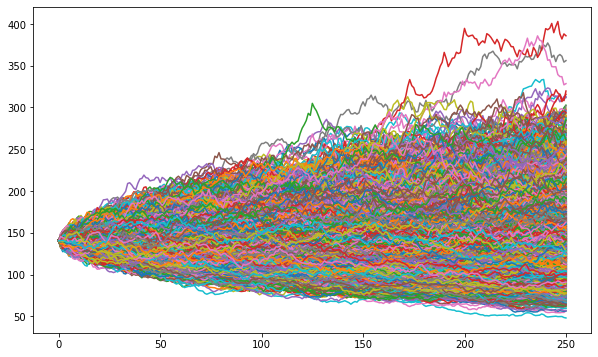

In [110]:
ticker = "NKE"
#data = pd.DataFrame()
#data[ticker] = wb.DataReader(ticker,data_source="yahoo",start="2010-1-1",end="2020-12-31")["Adj Close"]
#log_returns = np.log(1 + data.pct_change())

T = 1
r = 0.006
stdev = log_returns.std() * 250 ** 0.5
delta_t = T/t_intervals

stdev = stdev.values
t_intervals = 250
iterations = 10000

delta_t = T/t_intervals

Z = np.random.standard_normal((t_intervals + 1,iterations))
S = np.zeros_like(Z)
S0 = data.iloc[-1]
S[0] = S0

for t in range(1,t_intervals+1):
    S[t] = S[t-1] * np.exp((r-0.5*stdev**2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

plt.figure(figsize=(10,6))
plt.plot(S)

#コールオプションの式
p = np.maximum(S[-1] - 130,0)

#モンテカルロ法によって価格を推定
C_NKE = np.exp(-r*T) * np.sum(p)/iterations

In [86]:
print(C_NKE)
print(BSM_NKE)

19.491719127119584
NKE    20.059022
Name: 2020-12-31 00:00:00, dtype: float64


## ４資産の効率的フロンティア

Text(0, 0.5, 'Expected Return')

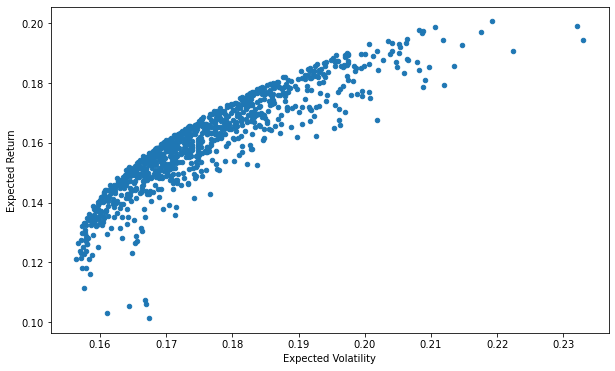

In [148]:
sec_returns = np.log(sec_data/ sec_data.shift(1))
sec_returns.mean() * 250
sec_returns.cov() * 250
sec_returns.corr()

assets = ["MSFT","KO","MCD","NKE"]

num_assets = len(assets)
arr = np.random.random(num_assets)
weights = np.random.random(num_assets)
weights  /= np.sum(weights)

num_assets = len(assets)
pfolio_returns = []
pfolio_volatilities = []

for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights*sec_returns.mean())*250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(sec_returns.cov()*250,weights))))

pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

portfolios = pd.DataFrame({"Return":pfolio_returns,"Volatility":pfolio_volatilities})

portfolios.plot(x="Volatility",y="Return",kind="scatter",figsize=(10,6))
plt.xlabel("Expected Volatility")
plt.ylabel("Expected Return")